   # Проведение А/В теста. Сравнение гипотез.

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Цель проекта:**
    
Используя фреймворки RICE и ICE приозведем приоритизацию гипотез и проведем A/B-тест
с целью поиска точек роста и увеличения выручки. Дадим рекомендации отделу маркетинга.

**Задачи проекта:**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примем решение по результатам теста и объясним его.

**Описание данных:**

- Файл /datasets/hypothesis.csv. Скачать датасет
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
- Файл /datasets/orders.csv. Скачать датасет
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- Файл /datasets/visitors.csv. Скачать датасет
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста



##  Приоритизация гипотез.

### Загрузка данных и подготовка их к анализу

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
from datetime import datetime
from scipy import stats as st
import datetime as dt

In [2]:
# загрузим данные 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
 # просмотр информации о таблицах и проверка наличия дубликатов
pd.options.display.max_colwidth = 150
d = {'hypothesis' : hypothesis, 'orders' : orders, 'visitors' : visitors}
for a, i in d.items():
    print(f'Название датафрейма {a}, количество дубликатов {i.duplicated().sum()}')
    display(i.head())
    display(i.info())
    display(i.describe())
    print('- ' * 50)

Название датафрейма hypothesis, количество дубликатов 0


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Название датафрейма orders, количество дубликатов 0


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Название датафрейма visitors, количество дубликатов 0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [4]:
#Чтобы часть столбцов в дальнейшем не скрывалась, настроим принудительное отображение
pd.set_option('display.max_columns', None)

Сейчас можем сказать, что некорректный тип данных столбца date,
пропусков нет,
проверить на дубликаты( полные и неочевидные).
Так же названия столбцов не соответствуют snake case. Исправляем.

In [5]:
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]
orders.columns = [x.replace('Id', '_id') for x in orders.columns.values]

In [6]:
#проверим названия столбцов
hypothesis.columns.to_list()

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [7]:
# преобразование данных о времени
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)  

Скорректировали названия столбцов (изменили на нижний регистр), изменили формат данных для дат, дубликаты и пропуски не обнаружены.
Можно приступать к анализу.

In [8]:
display(hypothesis.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

### Приоритизация гипотез

В нашем распоряжении файл с 9 гипотезами, для которых оценены значения Reach, Impact, Confidence и Efforts. Применим к этим оценкам фреймворки ICE и RICE.

**Применение фреймворка ICE для приоритизации гипотез.**

In [9]:
# Посчитаем ICE для гипотез
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [10]:
hypothesis['ICE'] = np.round(hypothesis['ICE'],
                      decimals = 2)
hypothesis['ICE']

0    13.33
1     2.00
2     7.00
3     1.12
4     1.00
5     1.33
6     8.00
7    11.20
8    16.20
Name: ICE, dtype: float64

Топ 5 по ice гипотезы 8,0,7,6,2

**Применение фреймворка RICE для приоритизации гипотез.**

In [11]:
# Посчитаем RICE для гипотез
hypothesis['RICE'] = (hypothesis['reach'] *  hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Топ 5 прежни, но позиции гипотез поменялись. Однако, если при ICE на первом месте гипотеза 8, то при расчёте RICE, на первое место вырвалась гипотеза под номером 7. Почему так произошло исследуем дальше.

**Анализ, как изменилась приоритизация гипотез при применении RICE вместо ICE.**

In [12]:
# Посмотрим на таблицу 
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


Параметр гипотезы 7 reach равен 10, в то время как у остальных гипотез он меньше.
Параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE.
Кроме силы гипотезы нужно учитывать и то, сколько пользователей она затронет.

##  Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах ab-orders.csv и ab-visitors.csv. Проанализируем A/B-тест. Первым делом проверим, нет ли пользователей, попавших одновременно в обе группы.

In [13]:
# количество уникальных пользоваталей в группе А
group_A = orders.query('group == "A"')
len(group_A['visitor_id'].unique())

503

In [14]:
# количество уникальных пользоваталей в группе В
group_B = orders.query('group == "B"')
len(group_B['visitor_id'].unique())

586

Есть несоответствие. В общей таблице у нас 1031 уникальных пользователей. А при разделении на группы 503+586 = 1089. То есть имеется 58 пользователей (1089-1031), которые попали в обе группы. Отыщем их.

In [15]:
union = group_A.merge(group_B,on = 'visitor_id')
len(union['visitor_id'].unique())

58

Нашли. Просто удалим этих пользователей из первоначальной таблицы для чистоты A/B теста.

In [16]:
visitor_both_group = union['visitor_id'].to_list()
orders = orders[~orders['visitor_id'].isin(visitor_both_group)]
len(orders['visitor_id'].unique())

973

In [17]:
#Проверяем
np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

array([], dtype=int64)

In [18]:
# количество уникальных пользоваталей в группе А
group_A = orders.query('group == "A"')
len(group_A['visitor_id'].unique())

445

In [19]:
# количество уникальных пользоваталей в группе В
group_B = orders.query('group == "B"')
len(group_B['visitor_id'].unique())

528

У нас 2 группы в А/В тесте - тест парный.
Укажем даты проведения теста и временные рамки используя таблицу с заказами.

In [20]:
print(f"Даты начала и окончания теста: с {orders['date'].min()} по {orders['date'].max()}")
print(f"Временные рамки теста: {orders['date'].max() - orders['date'].min()}")

Даты начала и окончания теста: с 2019-08-01 00:00:00 по 2019-08-31 00:00:00
Временные рамки теста: 30 days 00:00:00


### Построим график кумулятивной выручки по группам.

Подготовим таблицу для анализа результатов A/B теста.

In [21]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))\
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [22]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [23]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [24]:
#считаем средний чек и конверсию 
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [25]:
# результат
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,23,19,142779,719,6207.782609,0.031989
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843
2,2019-08-02,A,42,37,234381,1338,5580.500000,0.031390
3,2019-08-02,B,40,39,221801,1294,5545.025000,0.030912
4,2019-08-03,A,66,61,346854,1845,5255.363636,0.035772


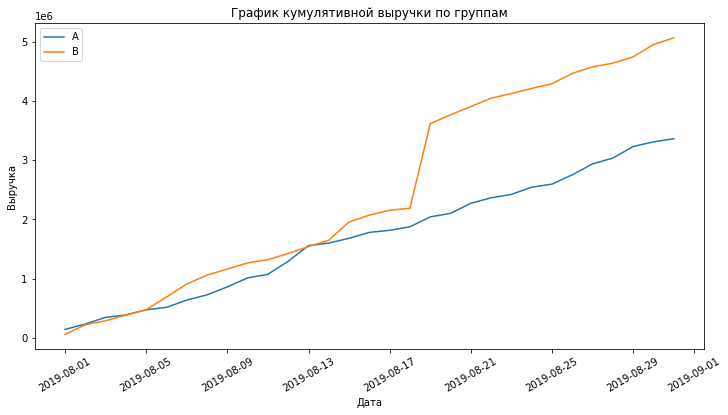

In [26]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Выручка в обеих группах увеличивается на протяжении всего теста. Однако в группе B есть резкий всплеск, который может свидетельствовать о всплеске числа заказов или о появлении неожиданно дорогих заказов. Резкий рост выручки группы В между датами 18.08.2019-19.08.2019.
В целом графики растут линейно и разница к концу времени теста обусловлена взлетом в середине временного отрезка анализа группы В.

### Построим график кумулятивного среднего чека по группам.

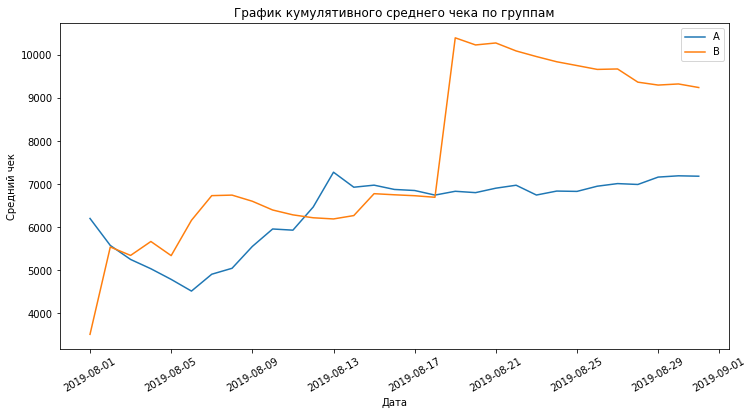

In [27]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.xticks(rotation=30)
plt.legend()
plt.show()

В эту же дату у группы B резкий скачок по кумулятивному среднему чеку и он стал плавно снижаться к концу теста. Утверждаемся в мысли, что в группу B попали крупные заказы, судя по резкому всплеску на графике. Средний чек в группе A за первые две недели после спада подрос и стабилизировался.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

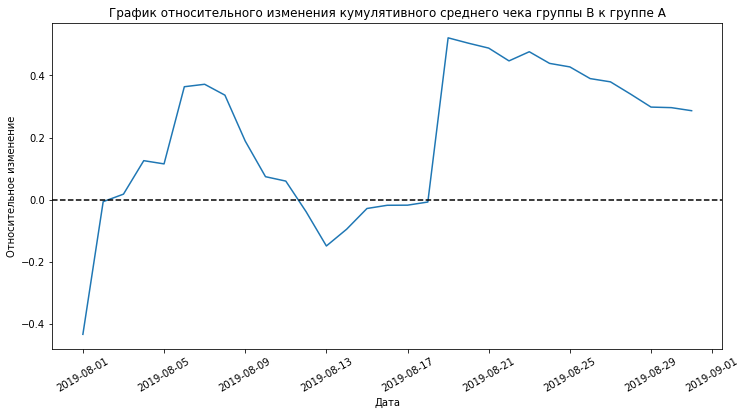

In [28]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Дата")
plt.ylabel('Относительное изменение')
plt.xticks(rotation=30)
plt.show()

Глядя на график относительного различия в среднем чеке между группами, видим как сильно меняются значения в определенные даты. В эти же даты мы их видели и на предыдущих графиках. Вероятно, тогда и были совершены аномальные заказы.

### Построим график кумулятивного среднего количество заказов на посетителя по группам.

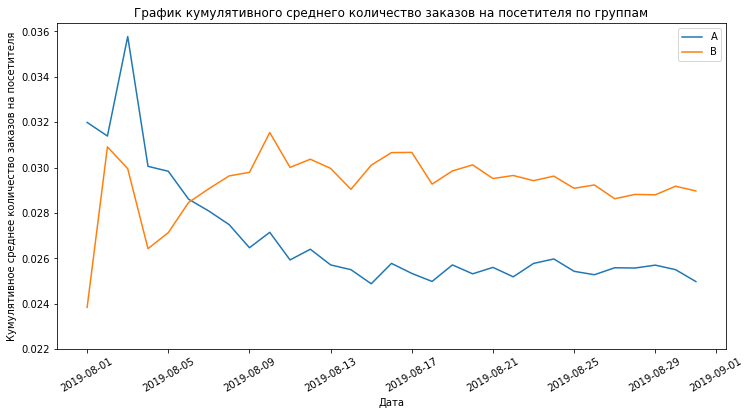

In [29]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего количество заказов на посетителя по группам')
plt.ylabel("Кумулятивное среднее количество заказов на посетителя")
plt.xlabel("Дата")
plt.ylim(0.022)
plt.xticks(rotation=30)
plt.legend()
plt.show()

Среднее количество заказов на посетителя группы A выглядит хуже, чем у группы B. В начале теста заметны сильные колебания. Группы стартовали с очень разных значений, но затем группа A постепенно просела, а группа B стабилизировалась - причем стабильно выше группы A.

### Построим график относительного изменения среднего количество заказов на посетителя группы B к группе A.

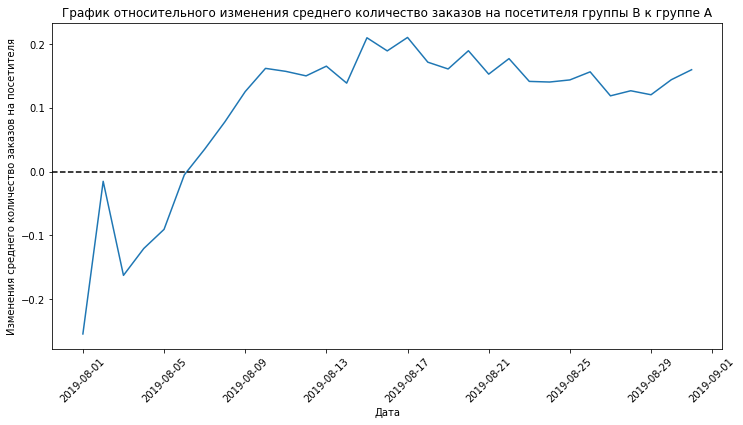

In [30]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения среднего количество заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel("Изменения среднего количество заказов на посетителя")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.show()

Относительное изменение среднего количество заказов на посетителя группы B всё так же выглядит лучше. В целом отношение по графику стабилизировалось с середины и до конца теста.

### Построим точечный график количества заказов по пользователям.

In [31]:
#создадим таблицу по количеству заказов каждого пользователя 
orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})

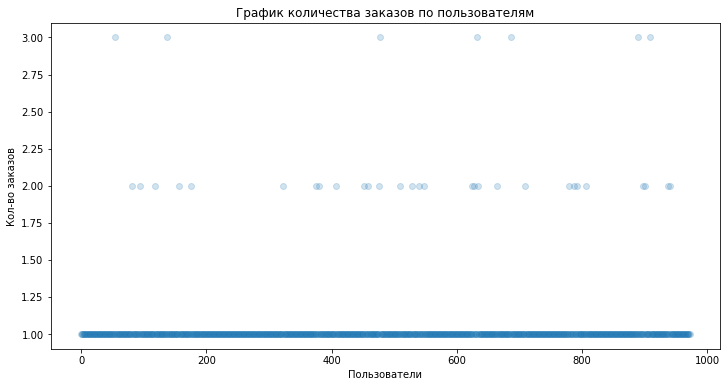

In [32]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], alpha = 0.2)
plt.title("График количества заказов по пользователям")
plt.ylabel("Кол-во заказов")
plt.xlabel("Пользователи")
plt.show()

 Большинство пользователей сделали 1 заказ, некоторые - 2, и всего 7 человек - 3 заказа. Совершившие 3 заказа возможно будут являться выбросами. Посчитаем выборочные перцентили количества заказов на одного пользователя и проверим это.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [33]:
display('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
display('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

'95 перцентиль: 1.00'

'99 перцентиль: 2.00'

95% пользователей совершают не больше 1 заказа, 99% совершают 2 заказа, аномальным будем считать 3 и более заказов.

### Построим точечный график стоимостей заказов.

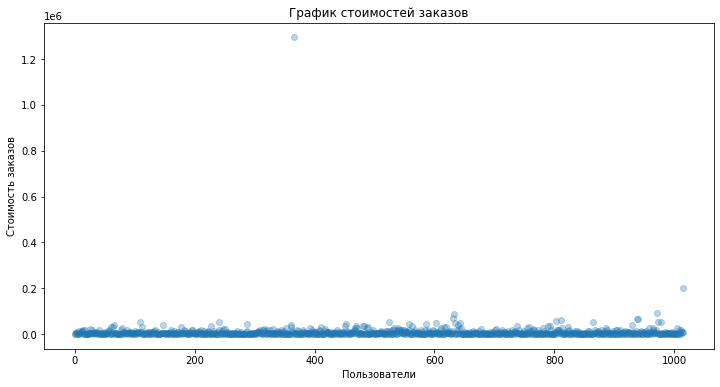

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'],alpha = 0.3)
plt.title("График стоимостей заказов")
plt.ylabel("Стоимость заказов")
plt.xlabel("Пользователи")
plt.show()

График малоинформативен из-за наличия аномального значения. Скорее всего это именно тот заказ, который вызывал скачки на графиках кумулятивной суммы и средней чека. Посмотрим поближе, для это уберем очевидные выбросы с 'revenue' большим 200000.

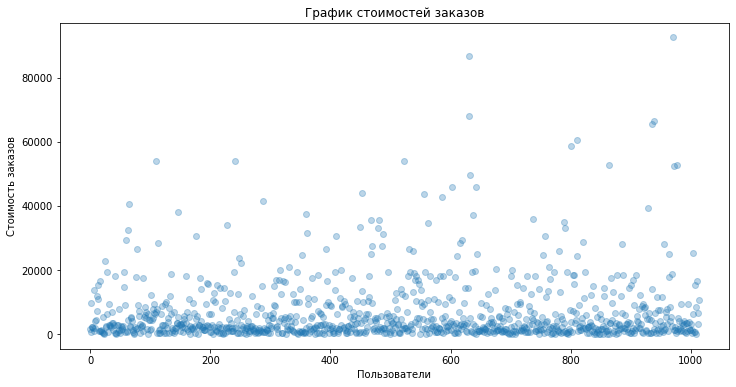

In [35]:
#отфильтруем и построим график без двух очень крупных выбросов
orders_without_big_check = orders.query('revenue < 200000')
x_values = pd.Series(range(0,len(orders_without_big_check['revenue'])))
plt.scatter(x_values, orders_without_big_check['revenue'],alpha = 0.3)
plt.title("График стоимостей заказов")
plt.ylabel("Стоимость заказов")
plt.xlabel("Пользователи")
plt.show()

Большая часть всех заказов не дороже 20000. Более точное распределение посмотрим с помощью перцентилей.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

У 95% заказов чек ниже 26785 рублей, и не более чем у 1% дороже 53904 рублей.
За границу определения аномальных заказов примем значение 53904.

### Посчитаем статистическую значимость различий в количестве заказов на пользователя между группами по «сырым» данным.

Начнём с подготовки данных.
Соберем в общую таблицу с сырыми данными все данные по заказам, визитам и количество заказов на пользователя.

In [37]:
conversion = (orders.groupby('group').agg({'transaction_id':'count', 'revenue' : 'sum'}).rename(columns={'transaction_id':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']

Сформулируем 2 статистические гипотезы:

H0: Количество заказов на пользователя в группе A статистически НЕ ОТЛИЧАЕТСЯ от группы B.

Н1: Количество заказов на пользователя в группе A статистически ОТЛИЧАЕТСЯ от группы B

Для проверки гипотез выбираем непараметрический Манна-Уитни т.к. у нас нет данных о нормальности распределения, сама выборка для теста не большая и с дисбалансом и нет уверенности в точности определения аномальных значений

In [38]:
#разобьем по группам A и B
ordersByVisitorA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': "nunique"})\
    ['transaction_id']
)

ordersByVisitorB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': "nunique"})\
    ['transaction_id']
)

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [39]:
sampleA = pd.concat((ordersByVisitorA,pd.Series([0] * (visitors[visitors['group'] == 'A'].visitors.sum() - ordersByVisitorA.shape[0]))))\
  .value_counts()

sampleB = pd.concat((ordersByVisitorB,pd.Series([0] * (visitors[visitors['group'] == 'B'].visitors.sum() - ordersByVisitorB.shape[0]))))\
  .value_counts()


In [40]:
sampleA = pd.concat((ordersByVisitorA,pd.Series([0] * (visitors[visitors['group'] == 'A'].visitors.sum() - ordersByVisitorA.shape[0]))))

sampleB = pd.concat((ordersByVisitorB,pd.Series([0] * (visitors[visitors['group'] == 'B'].visitors.sum() - ordersByVisitorB.shape[0]))))


In [41]:
# проведём тест 
display("p-value {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

display("Относительная разница между сравниваемыми величинами {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'p-value 0.011'

'Относительная разница между сравниваемыми величинами 0.160'

По «сырым» данным различий в среднем числе заказов на посетителя групп A и B нет. Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем. Относительный выигрыш группы В равен 16%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем 2 статистические гипотезы:

H0: Средний чек в группе A статистически НЕ ОТЛИЧАЕТСЯ от среднего чека в группе B.

Н1: Средний чек в группе A статистически ОТЛИЧАЕТСЯ от среднего чека в группе B.

In [42]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-value: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-value:  0.8294908998149533
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [43]:
display("Относительная разница между сравниваемыми величинами {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))

'Относительная разница между сравниваемыми величинами 0.287'

p-value = 0.829 значительно больше 0.05, поэтому можно считать, что значимых различий в среднем чеке между группами нет. По "сырым" данным средние чеки похожи. Относительная разница между сравниваемыми величинами 28.7%.

### Посчитаем статистическую значимость различий в количестве заказов на пользователя между группами по «очищенным» данным.

Выведем отфильтрованную таблицу normal_orders по количеству заказов не более 2. А в переменной clear_orders так же заказы на сумму не выше 53904.

In [44]:
bad_orders = orders_per_user[orders_per_user['orders'] > 3]['visitor_id'].to_list()
bad_cost = orders.query('revenue > 53904')['visitor_id'].to_list()
bad_users = bad_cost + bad_orders

In [45]:
#отфильтровали по количетсву заказов 
clear_orders = orders[~orders['visitor_id'].isin(bad_users)]

In [46]:
print('Абсолютные потери: {}, относительные потери: {:.2%}.'.format(len(bad_users), len(bad_users) / orders['visitor_id'].nunique()))

Абсолютные потери: 9, относительные потери: 0.92%.


Повторим наш код из пункта 4.10, только уже с очищенными данными.

Сформулируем 2 статистические гипотезы:

H0: Количество заказов на пользователя в группе A статистически НЕ ОТЛИЧАЕТСЯ от группы B.

Н1: Количество заказов на пользователя в группе A статистически ОТЛИЧАЕТСЯ от группы B.

In [47]:
#разобьем по группам A и B
ordersByVisitorA = (
    clear_orders[clear_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': "nunique"})\
    ['transaction_id']
)

ordersByVisitorB = (
    clear_orders[clear_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': "nunique"})\
    ['transaction_id']
)


sampleA = pd.concat((ordersByVisitorA,pd.Series([0] * (visitors[visitors['group'] == 'A'].visitors.sum() - ordersByVisitorA.shape[0]))))

sampleB = pd.concat((ordersByVisitorB,pd.Series([0] * (visitors[visitors['group'] == 'B'].visitors.sum() - ordersByVisitorB.shape[0]))))

# проведём тест 
print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница между сравниваемыми величинами {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.010
Относительная разница между сравниваемыми величинами 0.164


Вывод: По «очищенным» данным различия в среднем числе заказов на посетителя групп A и B также есть. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем. Относительный выигрыш группы В составил 16.4%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем 2 статистические гипотезы:

H0: Средний чек в группе A статистически НЕ ОТЛИЧАЕТСЯ от среднего чека в группе B

Н1: Средний чек в группе A статистически ОТЛИЧАЕТСЯ от среднего чека в группе B

In [48]:
alpha = 0.05
results = st.mannwhitneyu(clear_orders[clear_orders['group']=='A']['revenue'], clear_orders[clear_orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")
display("Относительная разница между сравниваемыми величинами {0:.3f}".format(clear_orders[clear_orders['group']=='B']['revenue'].mean() / clear_orders[clear_orders['group']=='A']['revenue'].mean() - 1))

p-значение:  0.9006884356560738
Не получилось отвергнуть H0: вывод о различии сделать нельзя


'Относительная разница между сравниваемыми величинами -0.032'

P-value = 0.954, значительно больше 0.05. Поэтому можем считать, что в среднем чеке нет различий (как и с "сырыми" данными).

**Графики кумулятивной конверсии и среднего чека по очищенным данным**

Для наглядности отразим на графиках по группам копулятивную конверсию и средний чек по очищенным данным.

In [49]:
clear_orders_grouped = (clear_orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))\
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'})
clear_orders_grouped['group_copy'] = clear_orders_grouped['group']
clear_orders_grouped = clear_orders_grouped.set_index(['date','group'])
orders_cumsum = clear_orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [50]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()  

In [51]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [52]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

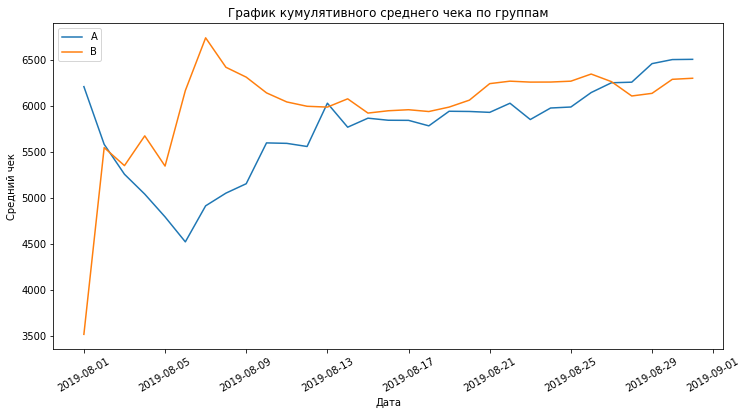

In [53]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.xticks(rotation=30)
plt.legend()
plt.show()

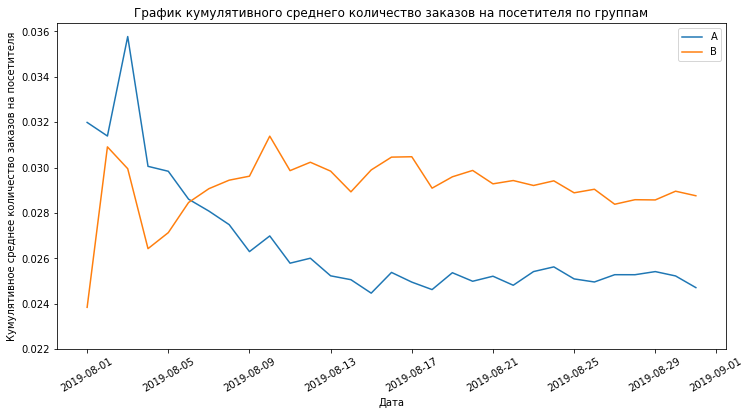

In [54]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего количество заказов на посетителя по группам')
plt.ylabel("Кумулятивное среднее количество заказов на посетителя")
plt.xlabel("Дата")
plt.ylim(0.022)
plt.xticks(rotation=30)
plt.legend()
plt.show()

## Решение по результатам теста с обоснованием

Вывод по результатам теста:

График кумулятивного среднего количества заказов на посетителя стабилизировался и при проверке гипотез (и по сырым, и по очищенным данным) мы можем говорить, что среднее количество заказов на посетителя в группе B лучше, чем в группе A.
График среднего чек не стабилизировался. График кумулятивного среднего чека по очищенным данным показывает, что график скачет и почти каждый день группа A и группа B меняются местами.
И по "сырым" и по "очищенным" данным различия в среднем числе заказов на посетителя групп A и B есть.
И по "сырым" и по "очищенным" данным различий в среднем чеке заказов групп A и B нет.
Примем решение завершить тест и зафиксировать , что "группа В показала себя лучше". Ведь при отсутствии статистической разницы между средним чеком у группы В будет большая выручка, так как среднее количество заказов на посетителя выше, чем в группе А.

Решение:

Основываясь на результатах проведенного А/В теста, рекомендую остановить тест и зафиксировать победу группы В по показателю среднего количества заказов на посетителя. Дальше отдел маркетинга может начать работу по стимуляции к увеличению среднего чека.